## Module: Supervised Learning
### Name: Priyanka Balakrishna Hejmadi

### Part A:
Domain: Medical

PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised
Learning algorithms.

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#### 1. Data Understanding

In [2]:
# A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]
normal_df = pd.read_csv("Normal.csv")
typeh_df = pd.read_csv("Type_H.csv")
types_df = pd.read_csv("Type_S.csv")

In [3]:
# B. Print Shape and columns of all the 3 DataFrames. [1 Mark]
print("Shape of Normal_df :", normal_df.shape)
print("Shape of typeh_df :", typeh_df.shape)
print("Shape of types_df :", types_df.shape)
print("")
print("Columns of Normal_df: ", normal_df.columns)
print("Columns of typeh_df: ", typeh_df.columns)
print("Columns of types_df: ", types_df.columns)

Shape of Normal_df : (100, 7)
Shape of typeh_df : (60, 7)
Shape of types_df : (150, 7)

Columns of Normal_df:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Columns of typeh_df:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Columns of types_df:  Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


 #### C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]
    
The three dataframes have columns of the same name and they are all in the same order.

In [4]:
# D. Print DataTypes of all the 3 DataFrames. [1 Mark]
print("Data types in normal_df: ", normal_df.dtypes)
print("Data types in typeh_df: ", typeh_df.dtypes)
print("Data types in types_df: ", types_df.dtypes)

Data types in normal_df:  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Data types in typeh_df:  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
Data types in types_df:  P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [5]:
# E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]
print("Unique categories in Class feature of normal_df", normal_df['Class'].unique())
print("Unique categories in Class feature of typeh_df", typeh_df['Class'].unique())
print("Unique categories in Class feature of types_df", types_df['Class'].unique())

Unique categories in Class feature of normal_df ['Normal' 'Nrmal']
Unique categories in Class feature of typeh_df ['Type_H' 'type_h']
Unique categories in Class feature of types_df ['Type_S' 'tp_s']


The Class feature of the normal_df dataframe has two unique values 'Normal' and 'Nrmal'.

The Class feature of the typeh_df dataframe has two unique values 'TypeH' and 'type_h'.

The Class feature of the types_df dataframe has two unique values 'Type_S' and 'tp_s'.

#### 2. Data Preparation and Exploration.

In [6]:
# A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]
normal_df.replace('Normal','normal', inplace=True)

In [7]:
print("Unique categories in Class feature of normal_df", normal_df['Class'].unique())

Unique categories in Class feature of normal_df ['normal' 'Nrmal']


In [8]:
normal_df.replace('Nrmal','normal', inplace=True)

In [9]:
print("Unique categories in Class feature of normal_df", normal_df['Class'].unique())

Unique categories in Class feature of normal_df ['normal']


In [10]:
typeh_df.replace('Type_H','type_h', inplace=True)

In [11]:
print("Unique categories in Class feature of typeh_df", typeh_df['Class'].unique())

Unique categories in Class feature of typeh_df ['type_h']


In [12]:
types_df.replace('Type_S','type_s',inplace=True)

In [13]:
print("Unique categories in Class feature of types_df", types_df['Class'].unique())

Unique categories in Class feature of types_df ['type_s' 'tp_s']


In [14]:
types_df.replace('tp_s','type_s',inplace=True)

In [15]:
print("Unique categories in Class feature of types_df", types_df['Class'].unique())

Unique categories in Class feature of types_df ['type_s']


All the dataframes have  been unified.

In [16]:
# B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
frame=[normal_df,typeh_df,types_df]
medical_df= pd.concat(frame, ignore_index=True)
medical_df.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal


In [17]:
medical_df.shape

(310, 7)

In [18]:
print("Unique categories in Class feature of medical_df", medical_df['Class'].unique())

Unique categories in Class feature of medical_df ['normal' 'type_h' 'type_s']


In [19]:
# C. Print 5 random samples of this DataFrame [1 Marks]
medical_df.sample(n=5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,type_s
181,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,type_s
229,77.236898,16.737622,49.775534,60.499275,110.690377,39.787154,type_s
175,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,type_s
287,60.419932,5.265665,59.814236,55.154267,109.033074,30.265785,type_s


In [20]:
# D. Print Feature-wise percentage of Null values. [1 Mark]
medical_df.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [21]:
percent_null = medical_df.isnull().sum() *100 / len(medical_df)
print(percent_null)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [22]:
# E. Check 5-point summary of the new DataFrame. [1 Mark]
medical_df.describe()# The 5 point summary includes the min,25th percentile, median, 75th percentile, and max value.

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


#### 3. Data Analysis

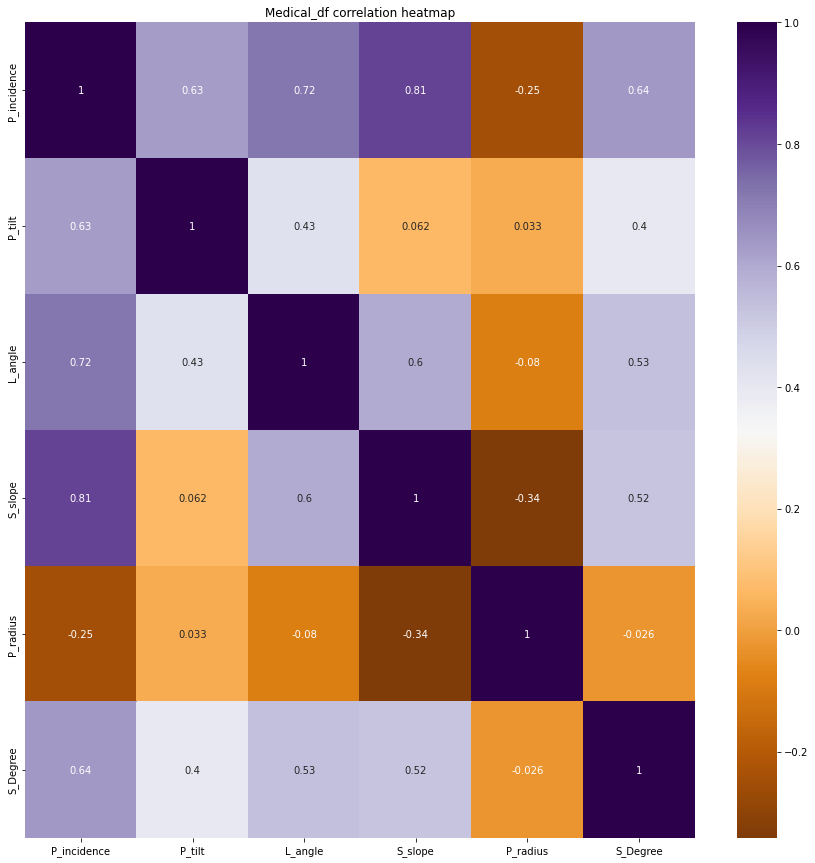

In [23]:
# A. Visualize a heatmap to understand correlation between all features [2 Marks]
corr = medical_df.corr()
plt.figure(figsize=(15,15));
sns.heatmap(corr,cmap='PuOr', annot=True);
plt.title('Medical_df correlation heatmap');

#### B. Share insights on correlation. [2 Marks]
 A. Features having a stronger correlation with correlation value.
 
Ans. S_slope and L_angle have a high positive correlation eith P_incidence with values 0.81 and 0.72 respectively.

B. Features having Weaker correlation with correlation value.

Ans. S_slope and P_radius have a loww correlation with P_tilt with values 0.062 and 0.033 respectively. P_radius and S_Degree have a low correlation of -0.026.

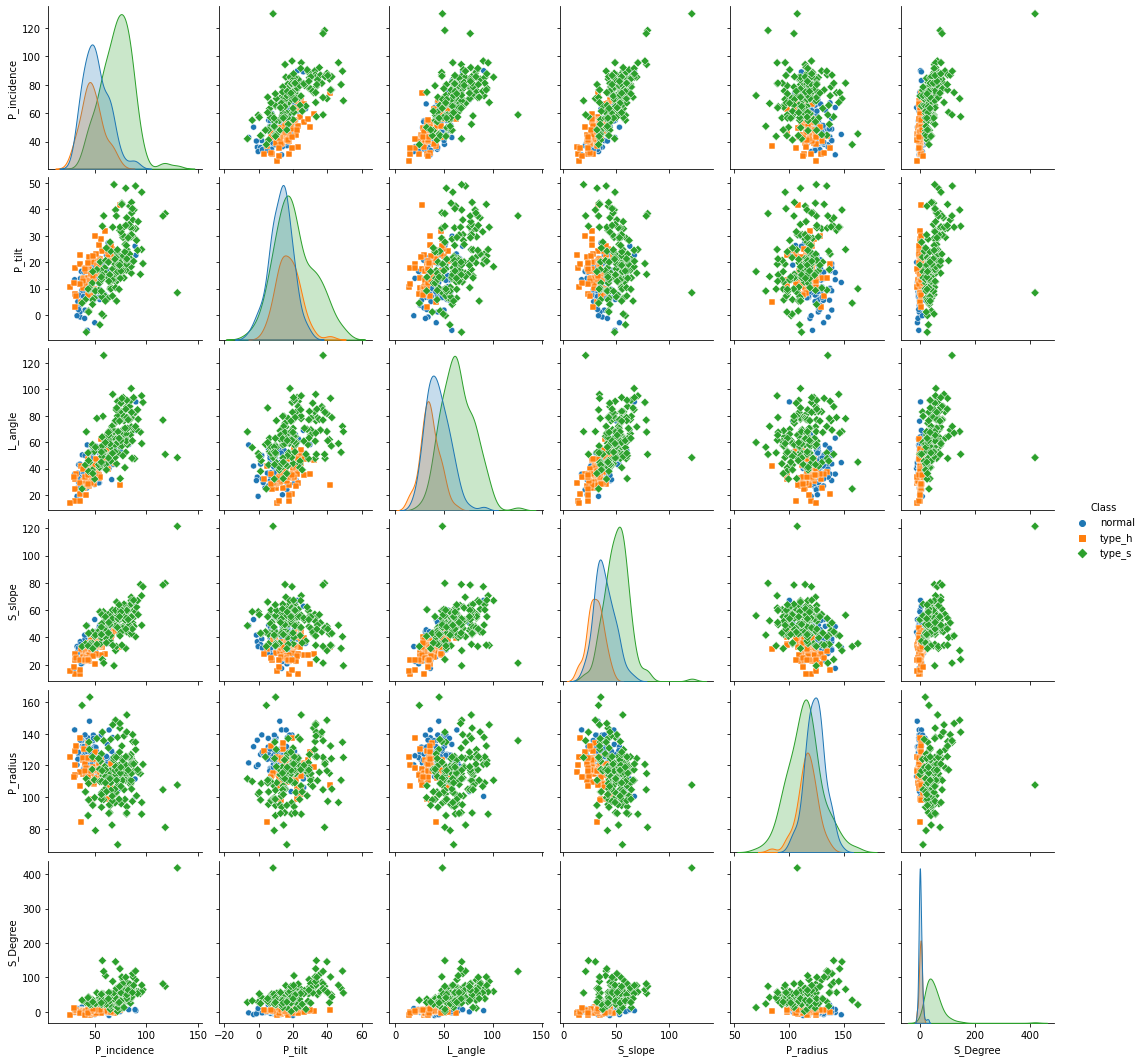

In [24]:
# C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

sns.pairplot(data=medical_df, hue='Class',markers=["o", "s", "D"]);

Insights:P_tilt, L_angle and S_slope show a strong positive correlation with P_incidence. S_Degree and L_angle show a weak positive correlation. S_Degree and P_incidence also shows weak positive correlation. The two classes type_h and type_s are distinguishable in most plots, but normal class seems to overlap with the other two classes.

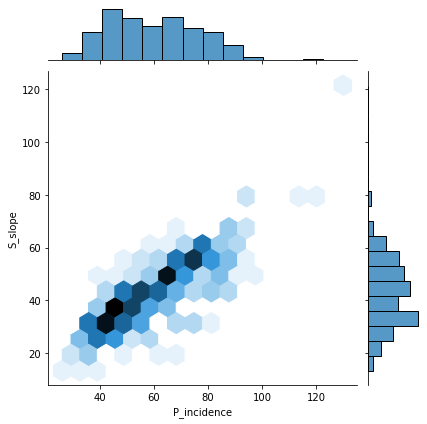

In [25]:
# D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]
sns.jointplot(data=medical_df, x='P_incidence', y='S_slope', kind='hex');

Insights: As shown in the jointplot above, there is a strong positive  correlation between S_slope and P_incidence. Further the plot shows a prominent central linear cluster.

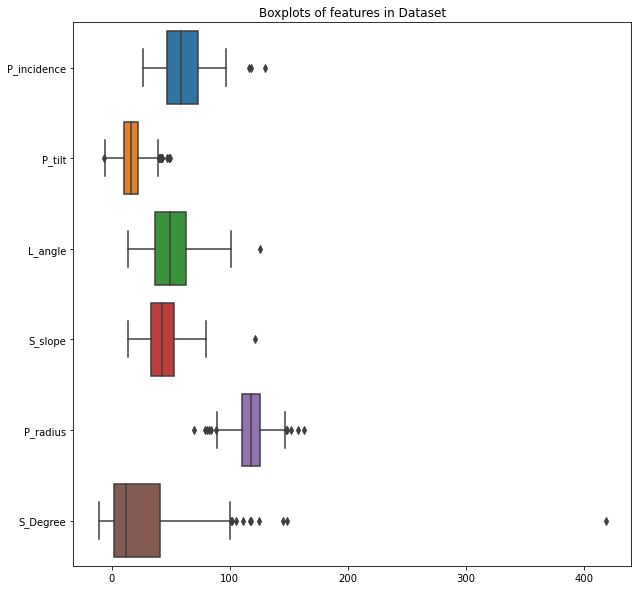

In [26]:
# E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]
plt.figure(figsize=(10,10));
plt.title('Boxplots of features in Dataset');
sns.boxplot(data= medical_df,orient='h');

Insights: From the boxplot we see that all features contain outliers. S_Degreee contains the most number of outliers. S_Degree is also right skewed. P_radius has outliers on both  sides of the curve. The outliers of P_tilt are very  close to the  whiskers. 

#### 4. Model building

In [27]:
# A. Split data into X and Y. [1 Marks]
X= medical_df.drop(labels='Class', axis=1)
y= medical_df['Class']
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


In [28]:
# B. Split data into train and test with 80:20 proportion. [1 Marks]
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [29]:
# C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors= 5, weights= 'distance')
model.fit(X_train,y_train)

KNeighborsClassifier(weights='distance')

In [30]:
# D. Print all the possible performance metrics for both train and test data. [2 Marks]
predicted_class = model.predict(X_test)
print("Performance on test set:",model.score(X_test, y_test))

Performance on test set: 0.8548387096774194


In [31]:
predicted_class[:10]

array(['normal', 'type_s', 'normal', 'normal', 'normal', 'normal',
       'type_s', 'type_h', 'type_h', 'type_s'], dtype=object)

In [32]:
print("Performance on train set:",model.score(X_train,y_train))

Performance on train set: 1.0


Confusion Matrix


<AxesSubplot:>

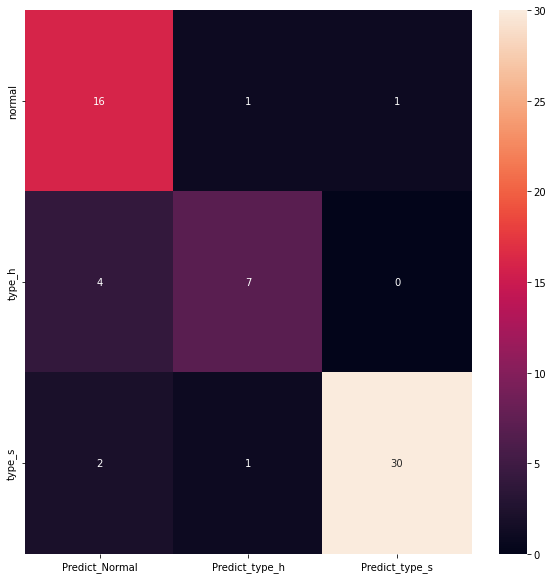

In [33]:
from sklearn  import metrics
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test,predicted_class, labels=['normal','type_h','type_s'])
df_cm= pd.DataFrame(cm, index= [i for i in ['normal', 'type_h','type_s']], columns =[i for i in ['Predict_Normal', 'Predict_type_h','Predict_type_s']])
plt.figure(figsize=(10,10))
sns.heatmap(df_cm, annot=True)

Most of the elements in the confusion matrix are in the diagonal. Hence the model is working well.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predicted_class)

0.8548387096774194

In [35]:
from sklearn.metrics import classification_report
target_names = ['normal','type_h','type_s']
print(classification_report(y_test, predicted_class, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.73      0.89      0.80        18
      type_h       0.78      0.64      0.70        11
      type_s       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.81      0.81        62
weighted avg       0.86      0.85      0.86        62



#### 5. Performance Improvement

In [36]:
# A. Experiment with various parameters to improve performance of the base model. [2 Marks]
# B. Clearly showcase improvement in performance achieved. [1 Marks]
# Changes in performance have been stated after each trial.
model.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'distance'}

We can experiment with the above parameters one by one and see the improvement in performance.

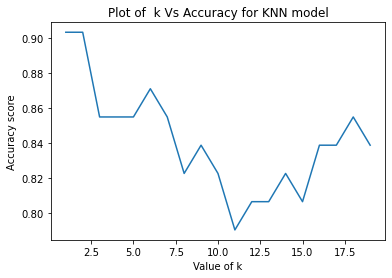

In [37]:
# ploting the  scores for various values of  K
score = []
for k  in range (1,20):
    model=KNeighborsClassifier(n_neighbors = k, weights= 'distance')
    model.fit(X_train,y_train)
    score.append(model.score(X_test,y_test))
    
plt.plot(range(1,20), score);
plt.title('Plot of  k Vs Accuracy for KNN model');
plt.xlabel('Value of k');
plt.ylabel('Accuracy score');

From the above  plot we see that the best value of k is 2 as the score is the highest. Let us print the performance metrics for K=2

In [38]:
model_k= KNeighborsClassifier(n_neighbors= 2, weights= 'distance')
model_k.fit(X_train,y_train)
predicted_class_k = model_k.predict(X_test)
print("Performance on test set:",model_k.score(X_test, y_test))

Performance on test set: 0.9032258064516129


In [39]:
print(classification_report(y_test, predicted_class_k, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.81      0.94      0.87        18
      type_h       0.89      0.73      0.80        11
      type_s       0.97      0.94      0.95        33

    accuracy                           0.90        62
   macro avg       0.89      0.87      0.88        62
weighted avg       0.91      0.90      0.90        62



Optimizing the K value to 2:The accuracy has increased by 5%, Average precision by 7%, Recall by 6%, and F1-score by 7%

In [40]:
# Let us now change the parameter weight to uniform and see the difference.
model_w= KNeighborsClassifier(n_neighbors= 2, weights= 'uniform')
model_w.fit(X_train,y_train)
predicted_class_w = model_w.predict(X_test)
print("Performance on test set:",model_w.score(X_test, y_test))

Performance on test set: 0.8225806451612904


In [41]:
print(classification_report(y_test, predicted_class_w, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.63      0.94      0.76        18
      type_h       1.00      0.45      0.62        11
      type_s       0.97      0.88      0.92        33

    accuracy                           0.82        62
   macro avg       0.87      0.76      0.77        62
weighted avg       0.87      0.82      0.82        62



The performance has actually decreased on changing the weights to uniform. Accuracy has decreased by 8%, precision by 2%, recall by 11% and F1-score by 11%. Hence distance is the best option for weights parameter.

Let us now change the metric parameter to different type of distance measurements and check the performance.
The default setting is minikowski with p=2 which calculates euclidian distance. We can change it to euclidean, Manhattan, Chebtshev and mahalanobis.

In [42]:
# Changing metric to manhattan
model_m= KNeighborsClassifier(n_neighbors= 2, weights= 'distance',metric='manhattan')
model_m.fit(X_train,y_train)
predicted_class_m = model_m.predict(X_test)
print("Performance on test set:",model_m.score(X_test, y_test))
print(classification_report(y_test, predicted_class_m, target_names=target_names))

Performance on test set: 0.8225806451612904
              precision    recall  f1-score   support

      normal       0.70      0.78      0.74        18
      type_h       0.73      0.73      0.73        11
      type_s       0.94      0.88      0.91        33

    accuracy                           0.82        62
   macro avg       0.79      0.79      0.79        62
weighted avg       0.83      0.82      0.83        62



The accuracy has decreased by 8%, Average precision has decreased by 10%, Average recall has decreased by 8% and F1-score has decreased by 9%.

In [43]:
# Changing metric to Chebyshev
model_m1= KNeighborsClassifier(n_neighbors= 2, weights= 'distance',metric='chebyshev')
model_m1.fit(X_train,y_train)
predicted_class_m1 = model_m1.predict(X_test)
print("Performance on test set:",model_m1.score(X_test, y_test))
print(classification_report(y_test, predicted_class_m1, target_names=target_names))

Performance on test set: 0.8064516129032258
              precision    recall  f1-score   support

      normal       0.68      0.72      0.70        18
      type_h       0.55      0.55      0.55        11
      type_s       0.97      0.94      0.95        33

    accuracy                           0.81        62
   macro avg       0.73      0.74      0.73        62
weighted avg       0.81      0.81      0.81        62



Compared to euclidean distance, the acuuracy of Chebyshev model has decreased by 9%, precision has decreased by 16%, recall has decreased by 13%.

In [44]:
# Changethe metric to mahalanobis
model_m2= KNeighborsClassifier(n_neighbors= 2, weights= 'distance',metric='mahalanobis',metric_params={'V': np.cov(X_train.T)})
model_m2.fit(X_train,y_train)
predicted_class_m2 = model_m2.predict(X_test)
print("Performance on test set:",model_m2.score(X_test, y_test))
print(classification_report(y_test, predicted_class_m2, target_names=target_names))

Performance on test set: 0.6935483870967742
              precision    recall  f1-score   support

      normal       0.52      0.67      0.59        18
      type_h       0.64      0.64      0.64        11
      type_s       0.86      0.73      0.79        33

    accuracy                           0.69        62
   macro avg       0.67      0.68      0.67        62
weighted avg       0.72      0.69      0.70        62



Using  the mahalanobis distance, The  accuracy has decreased by  21%, precision has decreased by 22%, recall has decreades by 19%, and F1-score has decreased by 21%. Mahalanobis distance performes teh worst among the distance metrics.

##### C. Clearly state which parameters contributed most to improve model performance. [1 Marks]
The parameters n_neighbors and  metrics contribute most to the performance of the model. The parameter weights also contributes significantly to the performance. The best combination of parameters are n_neighbors=2, metric ='euclidean', weights='distance' 

### Part B

Domain: Banking, Marketing

PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert
using the historical dataset.

#### 1. Data Understanding  and Preparation. 

In [45]:
# A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
df1 = pd.read_csv('Data1.csv')
df2 = pd.read_csv('Data2.csv')

In [46]:
# B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]
print("Shape of df1:",df1.shape)
print("Shape of df2:",df2.shape)
print("\n Columns of df1:",df1.columns)
print(" Columns of df2:",df2.columns)
print("\n Datatypes of df1:\n",df1.dtypes)
print("\n Datatypes of df2:\n",df2.dtypes)

Shape of df1: (5000, 8)
Shape of df2: (5000, 7)

 Columns of df1: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
 Columns of df2: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

 Datatypes of df1:
 ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

 Datatypes of df2:
 ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


In [47]:
# C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]
loan_df = pd.merge(df1,df2,on= 'ID')
loan_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [48]:
loan_df.columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level', 'Mortgage', 'Security',
       'FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard'],
      dtype='object')

In [49]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [50]:
# D. Change Datatype of below features to ‘Object’ [1 Marks]
# ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.
loan_df['CreditCard']=loan_df['CreditCard'].astype('object')
loan_df['InternetBanking']=loan_df['InternetBanking'].astype('object')
loan_df['FixedDepositAccount']=loan_df['FixedDepositAccount'].astype('object')
loan_df['Security']=loan_df['Security'].astype('object')
loan_df['Level']=loan_df['Level'].astype('object')
loan_df['HiddenScore']=loan_df['HiddenScore'].astype('object')

In [51]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


In [52]:
loan_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


#### 2. Data Exploration and Analysis.

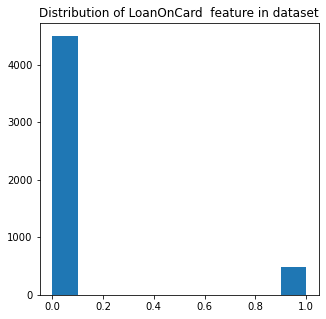

In [53]:
# A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
plt.figure(figsize=(5,5));
plt.hist(loan_df['LoanOnCard']);
plt.title('Distribution of LoanOnCard  feature in dataset' );

In [54]:
loan_df['LoanOnCard'].unique()

array([nan,  1.,  0.])

In [55]:
loan_df['LoanOnCard'].isnull().sum()

20

Insights: The feature is given as a float value but on close exammination, there are only two values 0 and 1. Some of the values are also missing.

In [56]:
# B. Check the percentage of missing values and impute if required. [1 Mark]
percentage_missing = loan_df['LoanOnCard'].isnull().sum() *100/ len(loan_df)
percentage_missing

0.4

In [57]:
loan_df['LoanOnCard'].median()

0.0

In [58]:
loan_df['LoanOnCard'][:10]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    1.0
Name: LoanOnCard, dtype: float64

In [59]:
# Impute the missing values top the median ie 0.
loan_df['LoanOnCard'].replace(np.nan,  0,inplace=True)

In [60]:
loan_df['LoanOnCard'].unique()

array([0., 1.])

In [61]:
loan_df['LoanOnCard'] = loan_df['LoanOnCard'].astype('int')

In [62]:
loan_df['LoanOnCard'].dtype

dtype('int32')

In [63]:
loan_df['LoanOnCard'][:5]

0    0
1    0
2    0
3    0
4    0
Name: LoanOnCard, dtype: int32

In [64]:
loan_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard               int32
dtype: object

In [65]:
# C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
loan_df['Level'].unique()

array([1, 2, 3], dtype=object)

The Level feature contains 3 values which need to be one hot encoded so the dataset can be used in a Logistic regression model.

In [66]:
loan_df= pd.get_dummies(loan_df, prefix='Level', columns=['Level'])
loan_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard,Level_1,Level_2,Level_3
0,1,25,1,49,91107,4,1.6,0,1,0,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,1,0,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,1,0,0,1,0


In [67]:
loan_df.shape

(5000, 16)

In [68]:
loan_df['Security'].unique()

array([1, 0], dtype=object)

In [69]:
loan_df['FixedDepositAccount'].unique()

array([0, 1], dtype=object)

In [70]:
loan_df['InternetBanking'].unique()

array([0, 1], dtype=object)

In [71]:
loan_df['CreditCard'].unique()

array([0, 1], dtype=object)

We have checked all the categorical variables and preprocessed them.

#### 3. Data Preparation and model building.

In [72]:
# A. Split data into X and Y. [1 Marks]
X= loan_df.drop(columns=['ID','ZipCode','LoanOnCard'], axis=1)
y=loan_df['LoanOnCard']

In [73]:
X.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,Level_1,Level_2,Level_3
0,25,1,49,4,1.6,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,0,1,0


In [74]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: LoanOnCard, dtype: int32

In [75]:
# B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [76]:
#Check the split of data
print("{0: 0.02f}% data is in training set".format((len(x_train)/len(loan_df.index))*100))
print("{0: 0.02f}% data is in test set".format((len(x_test)/len(loan_df.index))*100))

 75.00% data is in training set
 25.00% data is in test set


In [77]:
# C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]
from sklearn.linear_model import LogisticRegression
loan_model= LogisticRegression(solver='liblinear')
loan_model.fit(x_train,y_train)
y_pred=loan_model.predict(x_test)

In [78]:
# D. Print evaluation metrics for the model and clearly share insights. [1 Marks]
model_score = loan_model.score(x_test,y_test)
print(model_score)

0.9576


<AxesSubplot:>

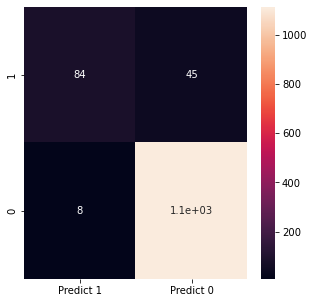

In [79]:
cm2= metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm2= pd.DataFrame(cm2,index= [i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm2,annot = True)

In [80]:
print("Classification metrics for base Logistic Regression model: \n",classification_report(y_test, y_pred)) #, target_names=[0,1]))

Classification metrics for base Logistic Regression model: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      1121
           1       0.91      0.65      0.76       129

    accuracy                           0.96      1250
   macro avg       0.94      0.82      0.87      1250
weighted avg       0.96      0.96      0.95      1250



From the confusion amtrix and classification report, we see that the False negative number is high. Consequently the recall for Label 1 is also low.

In [81]:
# E. Balance the data using the right balancing technique. [2 Marks]
y.value_counts()

0    4520
1     480
Name: LoanOnCard, dtype: int64

We use SMOTE Technique to handle the data imbalance probelm in the target variable.

In [82]:
!pip install -U imbalanced-learn

In [83]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [84]:
X_sm.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,Level_1,Level_2,Level_3
0,25,1,49,4.0,1.6,0,1.0,0.0,0.0,0.0,1,0,0
1,45,19,34,3.0,1.5,0,1.0,0.0,0.0,0.0,1,0,0
2,39,15,11,1.0,1.0,0,0.0,0.0,0.0,0.0,1,0,0
3,35,9,100,1.0,2.7,0,0.0,0.0,0.0,0.0,0,1,0
4,35,8,45,4.0,1.0,0,0.0,0.0,0.0,1.0,0,1,0


In [85]:
y_sm.value_counts()

0    4520
1    4520
Name: LoanOnCard, dtype: int64

Now the classes are balanced.

In [86]:
# F. Again train the same previous model on balanced data. [1 Marks]
x_train,x_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=1)

In [87]:
loan_model= LogisticRegression(solver='liblinear')
loan_model.fit(x_train,y_train)
y_pred=loan_model.predict(x_test)

In [88]:
# G. Print evaluation metrics and clearly share differences observed. [2 Marks]
model_score = loan_model.score(x_test,y_test)
print(model_score)

0.9424778761061947


<AxesSubplot:>

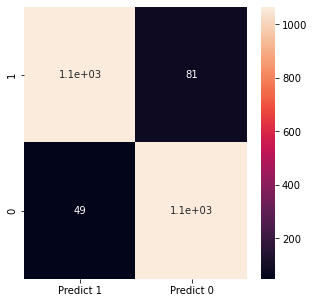

In [89]:
cm2= metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm2= pd.DataFrame(cm2,index= [i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm2,annot = True)

In [90]:
print("Classification report for Balanced Logistic Regression model: \n ",classification_report(y_test, y_pred))

Classification report for Balanced Logistic Regression model: 
                precision    recall  f1-score   support

           0       0.93      0.96      0.94      1114
           1       0.96      0.93      0.94      1146

    accuracy                           0.94      2260
   macro avg       0.94      0.94      0.94      2260
weighted avg       0.94      0.94      0.94      2260



The accuracy has decreased by 1%. The recall for Label 1 has increased significantly from 0.65 to 0.94. The precision for Label 1 has also increased from 0.91 to 0.96. The F1-score has increased from 0.76 to 0.95 for label 1.

#### 4. Performance Improvement.

In [91]:
# A. Train a base model each for SVM, KNN. [4 Marks]
from sklearn import svm
loan_svm = svm.SVC(gamma = 0.025, C = 3)

In [92]:
loan_svm.fit(x_train,y_train)

SVC(C=3, gamma=0.025)

In [93]:
y_ped_svm= loan_svm.predict(x_test)

In [94]:
model_score_svm = loan_svm.score(x_test,y_test)
print(model_score_svm)

0.9628318584070796


<AxesSubplot:>

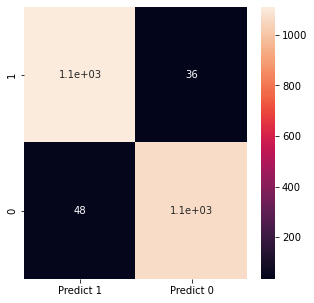

In [95]:
cm_svm= metrics.confusion_matrix(y_test,y_ped_svm,labels=[1,0])
df_cm_svm= pd.DataFrame(cm_svm,index= [i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm_svm,annot = True)

In [96]:
print("Classification report for Base SVM model:\n",classification_report(y_test, y_ped_svm))

Classification report for Base SVM model:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1114
           1       0.96      0.97      0.96      1146

    accuracy                           0.96      2260
   macro avg       0.96      0.96      0.96      2260
weighted avg       0.96      0.96      0.96      2260



In [97]:
# Building a KNN Model
from sklearn.neighbors import KNeighborsClassifier
nnh= KNeighborsClassifier(n_neighbors= 5, weights='distance')
nnh.fit(x_train,y_train)

KNeighborsClassifier(weights='distance')

In [98]:
predict_labels= nnh.predict(x_test)

In [99]:
nnh.score(x_test,y_test)

0.9252212389380531

<AxesSubplot:>

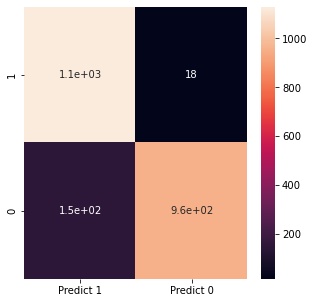

In [100]:
cm_nnh= metrics.confusion_matrix(y_test,predict_labels, labels=[1,0])
df_cm_nnh= pd.DataFrame(cm_nnh,index= [i for i in ['1','0']],
                    columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm_nnh,annot = True)

In [101]:
print("Classification report for Base KNN model:\n",classification_report(y_test, predict_labels))

Classification report for Base KNN model:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      1114
           1       0.88      0.98      0.93      1146

    accuracy                           0.93      2260
   macro avg       0.93      0.92      0.92      2260
weighted avg       0.93      0.93      0.92      2260



In [102]:
# B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
# We use the GrigSearchCV function to find thebest hyperparameters for SVM model.

In [103]:
svm_model = svm.SVC()


In [104]:
tuned_parameters = {
 'C': [1,2,3,4,5] , 'gamma': [0.01,0.025,0.05,0.1,0.5,1], 'kernel': ['rbf','linear'],
                   }

In [105]:
from sklearn.model_selection import RandomizedSearchCV
model_svm = RandomizedSearchCV(svm_model, tuned_parameters, cv=5, scoring='accuracy', return_train_score=False,n_iter=10, verbose=3,random_state=1)

In [106]:
model_svm.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=4, gamma=0.025, kernel=linear;, score=0.940 total time=  33.4s
[CV 2/5] END ...C=4, gamma=0.025, kernel=linear;, score=0.949 total time=  35.8s
[CV 3/5] END ...C=4, gamma=0.025, kernel=linear;, score=0.951 total time=  37.4s
[CV 4/5] END ...C=4, gamma=0.025, kernel=linear;, score=0.940 total time=  29.3s
[CV 5/5] END ...C=4, gamma=0.025, kernel=linear;, score=0.954 total time=  50.8s
[CV 1/5] END ....C=4, gamma=0.05, kernel=linear;, score=0.940 total time=  34.1s
[CV 2/5] END ....C=4, gamma=0.05, kernel=linear;, score=0.949 total time=  36.3s
[CV 3/5] END ....C=4, gamma=0.05, kernel=linear;, score=0.951 total time=  39.1s
[CV 4/5] END ....C=4, gamma=0.05, kernel=linear;, score=0.940 total time=  29.2s
[CV 5/5] END ....C=4, gamma=0.05, kernel=linear;, score=0.954 total time=  50.4s
[CV 1/5] END ......C=1, gamma=0.025, kernel=rbf;, score=0.934 total time=   1.6s
[CV 2/5] END ......C=1, gamma=0.025, kernel=rbf;

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 2, 3, 4, 5],
                                        'gamma': [0.01, 0.025, 0.05, 0.1, 0.5,
                                                  1],
                                        'kernel': ['rbf', 'linear']},
                   random_state=1, scoring='accuracy', verbose=3)

In [113]:
print(model_svm.best_score_)

0.9622418879056047


In [108]:
print(model_svm.best_params_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 5}


In [114]:
# Print evaluation metrics for the final model
best_svm= svm.SVC(gamma=0.01,C=5,kernel='rbf')
best_svm.fit(x_train,y_train)
y_pred_best= best_svm.predict(x_test)
print("Classification metrics for final SVM model:\n",classification_report(y_test, y_pred_best))

Classification metrics for final SVM model:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      1114
           1       0.95      0.98      0.97      1146

    accuracy                           0.97      2260
   macro avg       0.97      0.97      0.97      2260
weighted avg       0.97      0.97      0.97      2260



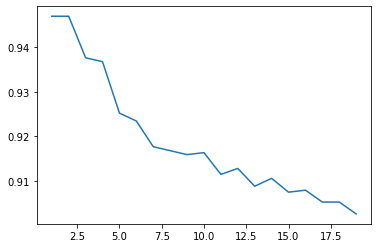

In [115]:
#Finding the best parameters for KNN model
score = []
for k  in range (1,20):
    model=KNeighborsClassifier(n_neighbors = k, weights= 'distance')
    model.fit(x_train,y_train)
    score.append(model.score(x_test,y_test))
    
plt.plot(range(1,20), score)

From the pot we can see that the highest score is for a k value of 1,2. We find the classification report based on k=2 parameter

In [116]:
model3= KNeighborsClassifier(n_neighbors= 2, weights= 'distance')
model3.fit(x_train,y_train)
predicted3 = model3.predict(x_test)
print("Performance on test set:",model3.score(x_test, y_test))
print("Classification report for Final KNN model:\n",classification_report(y_test, predicted3))

Performance on test set: 0.9469026548672567
Classification report for Final KNN model:
               precision    recall  f1-score   support

           0       0.98      0.91      0.94      1114
           1       0.92      0.99      0.95      1146

    accuracy                           0.95      2260
   macro avg       0.95      0.95      0.95      2260
weighted avg       0.95      0.95      0.95      2260



The best SVM had an accuracy of 0.97 and the KNN model has an accuracy of 0.95.


#### D. Share improvement achieved from Base model to final model.
The SVM has slightly improved from accuracy from 0.96 to 0.97. The precision, recall and F1-score has also increased from 0.96 to 0.97.

Knn model has improved accuracy from 0.93 to 0.95. The recall has increased from 0.92 to 0.95.